# STAT207 Final Project - All Star or Bum?


 1. Albert Chen
 2. Josh Fajardo
 3. Shray Srivastava
 4. Justin Starks

In [1]:
#Imports here
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')



## 1. Introduction

Research Introduction & Motivation

This model can be built to appeal to various audiences. The motivation of creating this model can aid sports analysts in their predictions of NBA All-Stars in the upcoming season, sport betters who want to bet on potential all stars for the upcoming NBA season, and even NBA players to see how well they need to play to become an All-Star. In the context of predicting NBA All-Stars, the "positives" would be the players who are selected as All-Stars, and the "negatives" would be those who are not selected. Since the goal of our model is to predict NBA All-Stars, we believe that those would utilize this model would prefer a model that would be better at classifying positive, or All-Stars, in this case. According to Sara Brown of MIT, "programmers choose a machine learning model to use, supply the data, and let the computer model train itself to find patterns or make predictions" (Machine Learning, explained, 2021). If this is the case would we prefer our model to be better at predicting the wrong outcome? Furthermore a potential user of this model can be a sports better, according to Neil Sahota, a professor at UC Irvine, "AI, with its unparalleled ability to analyze vast datasets and discern patterns beyond human capability, is emerging as the new MVP in this field" (The Game Changer: How AI Is Transforming The World Of Sports Gambling, 2024).

### Research Goal Statement

Our research goal is to build a predictive model that will effectively predict if an NBA player is an All Star in new datasets.

### Secondary Research Goal Statement

Ideally, we would like for our chosen model to also yield reliable interpretative insights about the nature of the relationship between the variables in the dataset.

## 2. Dataset Discussion

In [2]:
per_game_stats = pd.read_csv('NBA_PG_Stats.csv')
per_game_stats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,achiupr01
1,2,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,achiupr01
2,3,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6,achiupr01
3,4,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,adebaba01
4,5,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,agbajoc01


In [3]:
per_game_stats.shape[0]

735

In [4]:
advanced_stats = pd.read_csv('NBA_PG_ADV.csv')
advanced_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional
0,1,Precious Achiuwa,PF-C,24,TOT,74,1624,14.6,0.545,0.207,...,1.2,2.2,3.4,0.102,NaN,-1.7,0.3,-1.4,0.2,achiupr01
1,1,Precious Achiuwa,C,24,TOR,25,437,15.0,0.512,0.276,...,0.0,0.4,0.4,0.048,NaN,-1.4,-0.2,-1.6,0.0,achiupr01
2,1,Precious Achiuwa,PF,24,NYK,49,1187,14.5,0.564,0.167,...,1.2,1.8,3.0,0.122,NaN,-1.9,0.5,-1.4,0.2,achiupr01
3,2,Bam Adebayo,C,26,MIA,71,2416,19.8,0.576,0.041,...,2.9,4.3,7.2,0.144,NaN,0.8,1.7,2.4,2.7,adebaba01
4,3,Ochai Agbaji,SG,23,TOT,78,1641,7.7,0.497,0.487,...,-0.5,0.6,0.1,0.002,NaN,-3.5,-0.9,-4.4,-1.0,agbajoc01


In [5]:
advanced_stats.shape[0]

735

We found these csv files from Sports-Reference.com. This file was download on 4/17/2024, and the player per game stats were found on https://www.basketball-reference.com/leagues/NBA_2024_per_game.html and the advanced statistics were found on https://www.basketball-reference.com/leagues/NBA_2024_advanced.html. In these specific datasets, rows represent NBA players, the NBA uses cameras and Second Spectrum software tracks the movements of every player on the court and the basketball 25 times per second and records player statistics. The dataset could potentially not account all observations. Some players are referred as two-way players, and spend some time in the NBA or G-League. These players might not be included in the dataset. However, this will not likely have a big effect on the dataset because it's unlikely that a two-way player is going to be an All-Star. Our response variable is going to be All-Stars. These players are selected by fans for their fantastic performance throughout the season. The explanatory variables we intend to use are points, rebounds, assist, steals+blocks, Win Shares, and usage. Points are the total number of points a player scores in a game. This is one of the most direct measures of a player's offensive contributions on the court. Points can be scored through field goals, three-point shots, and free throws. Rebounds are recorded whenever a player retrieves the ball after a missed shot that hits the rim or backboard. Rebounds are classified into two categories: Offenseive and Defensive rebounds. An assist is credited to a player who passes the ball to a teammate in a way that leads to a score. This statistic is a key indicator of a player’s ability to distribute the ball and set up teammates for scoring opportunities. A steal occurs when a defensive player legally takes the ball away from an offensive player, which leads to a change in possession. A block is recorded when a defensive player legally deflects an offensive player's shot attempt, preventing the ball from going into the basket. Adding steals and blocks together gives a combined measure of a player’s defensive plays that directly interrupt the opponent’s scoring attempts. Win Shares is an advanced statistic that estimates the number of wins contributed by a player to their team’s total success. It combines various aspects of play (offense and defense) into a single number that quantifies a player's overall impact on winning games. It is calculated using player, team, and league statistics in both offensive and defensive dimensions.Usage rate is an estimate of the percentage of team plays used by a player while they were on the floor. It is a measure of how often a player attempts to score, assists on a basket, or commits a turnover. High usage rates can indicate that a player has a significant role in their team's offense. We chose to focus on these variables because we believe they will help accurately predict All-Stars.

## 3. Dataset Cleaning

Missing Values Detection and Cleaning for Per Game Statitics and Advanced Statistics

For both of our datasets, the inevitable has happened to certain players: they were traded. As a result there are duplicates present in these datasets. However, Basketball-Reference does a fantastic job of mitigating this by adding a 'Tot' observation. This 'Tot' or Total means the total statistics from this player and all teams they have played on throughout the season.

In [6]:
per_game_stats = per_game_stats[[ 'Player' , 'Tm', 'Pos' , 'PTS' , 'TRB' , 'AST' , 'STL' , 'BLK' ]]
per_game_stats

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK
0,Precious Achiuwa,TOT,PF-C,7.6,6.6,1.3,0.6,0.9
1,Precious Achiuwa,TOR,C,7.7,5.4,1.8,0.6,0.5
2,Precious Achiuwa,NYK,PF,7.6,7.2,1.1,0.6,1.1
3,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9
4,Ochai Agbaji,TOT,SG,5.8,2.8,1.1,0.6,0.6
...,...,...,...,...,...,...,...,...
730,Thaddeus Young,PHO,PF,2.3,2.8,0.7,0.5,0.2
731,Trae Young,ATL,PG,25.7,2.8,10.8,1.3,0.2
732,Omer Yurtseven,UTA,C,4.6,4.3,0.6,0.2,0.4
733,Cody Zeller,NOP,C,1.8,2.6,0.9,0.2,0.1


In [7]:
per_game_stats = per_game_stats.dropna()
per_game_stats

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK
0,Precious Achiuwa,TOT,PF-C,7.6,6.6,1.3,0.6,0.9
1,Precious Achiuwa,TOR,C,7.7,5.4,1.8,0.6,0.5
2,Precious Achiuwa,NYK,PF,7.6,7.2,1.1,0.6,1.1
3,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9
4,Ochai Agbaji,TOT,SG,5.8,2.8,1.1,0.6,0.6
...,...,...,...,...,...,...,...,...
730,Thaddeus Young,PHO,PF,2.3,2.8,0.7,0.5,0.2
731,Trae Young,ATL,PG,25.7,2.8,10.8,1.3,0.2
732,Omer Yurtseven,UTA,C,4.6,4.3,0.6,0.2,0.4
733,Cody Zeller,NOP,C,1.8,2.6,0.9,0.2,0.1


In [8]:
advanced_stats = advanced_stats[['Player', 'WS' , 'USG%']]
advanced_stats

,Player,WS,USG%
0,Precious Achiuwa,3.4,15.9
1,Precious Achiuwa,0.4,21.2
2,Precious Achiuwa,3.0,14.0
3,Bam Adebayo,7.2,24.9
4,Ochai Agbaji,0.1,13.4
...,...,...,...
730,Thaddeus Young,0.3,12.8
731,Trae Young,4.6,30.5
732,Omer Yurtseven,0.7,17.9
733,Cody Zeller,0.8,12.9


In [9]:
advanced_stats = advanced_stats.dropna()
advanced_stats

,Player,WS,USG%
0,Precious Achiuwa,3.4,15.9
1,Precious Achiuwa,0.4,21.2
2,Precious Achiuwa,3.0,14.0
3,Bam Adebayo,7.2,24.9
4,Ochai Agbaji,0.1,13.4
...,...,...,...
730,Thaddeus Young,0.3,12.8
731,Trae Young,4.6,30.5
732,Omer Yurtseven,0.7,17.9
733,Cody Zeller,0.8,12.9


For both of our datasets, the inevitable has happened to certain players: they were traded. As a result there are duplicates present in these datasets. However, Basketball-Reference does a fantastic job of mitigating this by adding a 'Tot' observation. This 'Tot' or Total means the total statistics from this player and all teams they have played on throughout the season.

In [10]:
per_game_stats.drop_duplicates(subset='Player', keep='first', inplace=True)
per_game_stats

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK
0,Precious Achiuwa,TOT,PF-C,7.6,6.6,1.3,0.6,0.9
3,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9
4,Ochai Agbaji,TOT,SG,5.8,2.8,1.1,0.6,0.6
7,Santi Aldama,MEM,PF,10.7,5.8,2.3,0.7,0.9
8,Nickeil Alexander-Walker,MIN,SG,8.0,2.0,2.5,0.8,0.5
...,...,...,...,...,...,...,...,...
728,Thaddeus Young,TOT,PF,4.2,3.1,1.7,0.7,0.2
731,Trae Young,ATL,PG,25.7,2.8,10.8,1.3,0.2
732,Omer Yurtseven,UTA,C,4.6,4.3,0.6,0.2,0.4
733,Cody Zeller,NOP,C,1.8,2.6,0.9,0.2,0.1


In [11]:
advanced_stats.drop_duplicates(subset = 'Player' , keep = 'first' , inplace = True)
advanced_stats

,Player,WS,USG%
0,Precious Achiuwa,3.4,15.9
3,Bam Adebayo,7.2,24.9
4,Ochai Agbaji,0.1,13.4
7,Santi Aldama,2.4,17.9
8,Nickeil Alexander-Walker,4.3,14.8
...,...,...,...
728,Thaddeus Young,1.3,12.6
731,Trae Young,4.6,30.5
732,Omer Yurtseven,0.7,17.9
733,Cody Zeller,0.8,12.9


In [12]:
#Merging advanced stats and per_game_stats
final_df = pd.merge(per_game_stats , advanced_stats , on = 'Player' , how = 'outer')
final_df

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK,WS,USG%
0,Precious Achiuwa,TOT,PF-C,7.6,6.6,1.3,0.6,0.9,3.4,15.9
1,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9,7.2,24.9
2,Ochai Agbaji,TOT,SG,5.8,2.8,1.1,0.6,0.6,0.1,13.4
3,Santi Aldama,MEM,PF,10.7,5.8,2.3,0.7,0.9,2.4,17.9
4,Nickeil Alexander-Walker,MIN,SG,8.0,2.0,2.5,0.8,0.5,4.3,14.8
...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,TOT,PF,4.2,3.1,1.7,0.7,0.2,1.3,12.6
568,Trae Young,ATL,PG,25.7,2.8,10.8,1.3,0.2,4.6,30.5
569,Omer Yurtseven,UTA,C,4.6,4.3,0.6,0.2,0.4,0.7,17.9
570,Cody Zeller,NOP,C,1.8,2.6,0.9,0.2,0.1,0.8,12.9


After dropping the duplicates from players being traded throughout the season, we ended up with a merged dataframe of all of our explanatory variables. However, after using the dropna command no rows were removed from both datasets. We dropped 118 observations however because they were traded and were duplicated in the datasets. By doing this, it ensures the analysis is based on complete data without any other potential roadblocks that could skew our prediction. Some pros of removing rows with missing values ensures that the analysis is based on complete data, which would later one avoid potential errors that stems from missing values. A con from dropping row with missing values is that it may reduce the sample size and potentially lead to a loss of information, especially if the missing data is not random.

In [13]:
allstars= ["Bam Adebayo", "Giannis Antetokounmpo", "Tyrese Haliburton", "Damian Lillard", "Jayson Tatum", "Paolo Banchero", "Scottie Barnes", "Jaylen Brown", "Jalen Brunson", "Tyrese Maxey", "Donovan Mitchell", "Julius Randle", "Trae Young", "Joel Embiid", "Karl-Anthony Towns", "Kawhi Leonard", "Paul George", "Anthony Edwards", "Anthony Davis", "Stephen Curry", "Devin Booker", "Nikola Jokic", "LeBron James", "Shai Gilgeous-Alexander", "Kevin Durant", "Luka Doncic"]
final_df['isAllStar'] = final_df['Player'].isin(allstars).replace({True: 'Yes', False: 'No'})
final_df

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK,WS,USG%,isAllStar
0,Precious Achiuwa,TOT,PF-C,7.6,6.6,1.3,0.6,0.9,3.4,15.9,No
1,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9,7.2,24.9,Yes
2,Ochai Agbaji,TOT,SG,5.8,2.8,1.1,0.6,0.6,0.1,13.4,No
3,Santi Aldama,MEM,PF,10.7,5.8,2.3,0.7,0.9,2.4,17.9,No
4,Nickeil Alexander-Walker,MIN,SG,8.0,2.0,2.5,0.8,0.5,4.3,14.8,No
...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,TOT,PF,4.2,3.1,1.7,0.7,0.2,1.3,12.6,No
568,Trae Young,ATL,PG,25.7,2.8,10.8,1.3,0.2,4.6,30.5,Yes
569,Omer Yurtseven,UTA,C,4.6,4.3,0.6,0.2,0.4,0.7,17.9,No
570,Cody Zeller,NOP,C,1.8,2.6,0.9,0.2,0.1,0.8,12.9,No


In [14]:
final_df['isAllStar'].value_counts()

isAllStar
No     546
Yes     26
Name: count, dtype: int64

In [15]:
num_yes = final_df[final_df["isAllStar"]=="Yes"]
num_yes

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK,WS,USG%,isAllStar
1,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9,7.2,24.9,Yes
10,Giannis Antetokounmpo,MIL,PF,30.4,11.5,6.5,1.2,1.1,13.2,33.0,Yes
24,Paolo Banchero,ORL,PF,22.6,6.9,5.4,0.9,0.6,5.3,29.7,Yes
29,Scottie Barnes,TOR,SG,19.9,8.2,6.1,1.3,1.5,4.3,24.8,Yes
53,Devin Booker,PHO,PG,27.1,4.5,6.9,0.9,0.4,9.2,29.8,Yes
70,Jaylen Brown,BOS,SF,23.0,5.5,3.6,1.2,0.5,5.9,28.9,Yes
75,Jalen Brunson,NYK,PG,28.7,3.6,6.7,0.9,0.2,11.2,32.5,Yes
113,Stephen Curry,GSW,PG,26.4,4.5,5.1,0.7,0.4,7.2,31.3,Yes
115,Anthony Davis,LAL,C,24.7,12.6,3.5,1.2,2.3,11.8,26.7,Yes
127,Luka Doncic,DAL,PG,33.9,9.2,9.8,1.4,0.5,12.0,36.0,Yes


Finally, we added our binary response variable column "Is All Star" using who we know made the all star team from this past year.

## Outlier Cleaning - Two Variable Outlier Inspection

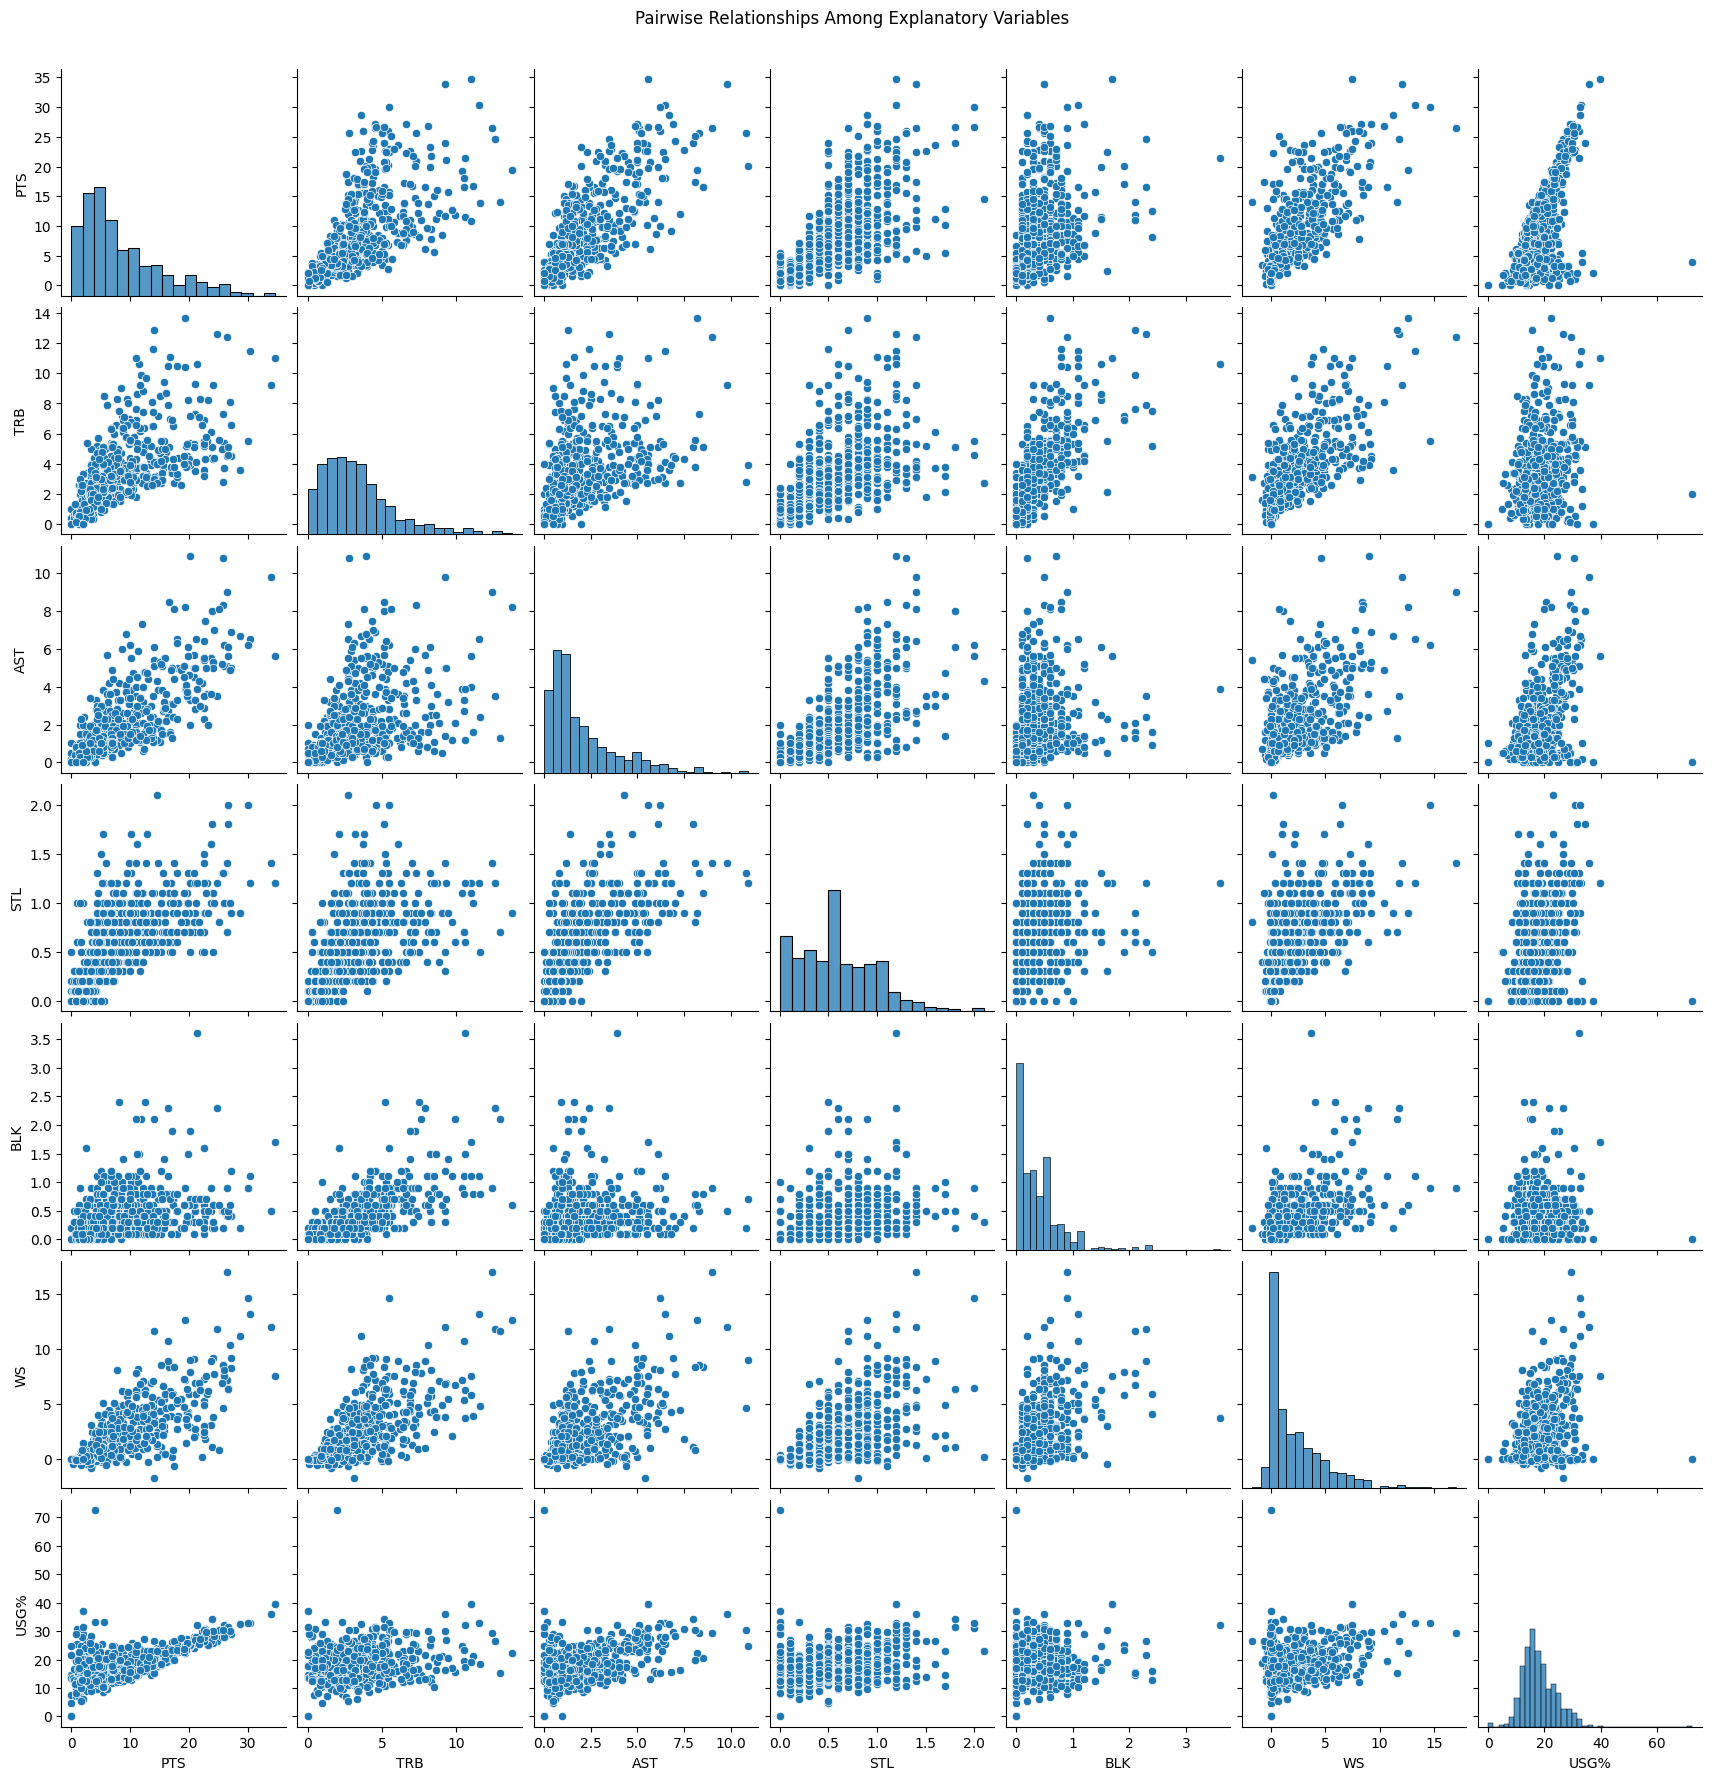

In [16]:
selected_columns = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'USG%']
sns.pairplot(final_df[selected_columns])
plt.suptitle('Pairwise Relationships Among Explanatory Variables', y=1.02)
plt.show()

In analyzing real NBA statistics, it's essential to carefully consider outliers due to their potential insights into player performances and team strategies. NBA metrics like points per game, rebounds, and more complex statistics such as Win Shares (WS) can vary widely. Outliers might represent extraordinary events—like unusually high scores—which could indicate significant shifts in player abilities or strategic team changes rather than filler data or a mistake in data collection. It's critical to determine whether these data points result from errors or are true instances of exceptional performance by reviewing game footage, player histories, and other contextual factors. For how in-depth, NBA analytics goes, prematurely removing these outliers could misrepresent a player's peak capabilities or a team's strategic efficacy. As a result, this can leave certain players or team statistics unexamined. This could lead to under/overestimations of regular performance. We have decided to keep all outliers in our datasets because they represent true NBA player per game and advanced statistics.

### Other Data Cleaning

As mentioned prior, since removing outliers was not necessary we did not look into other data cleaning techniques. We have not removed any outliers.

## 4. Preliminary Analysis

Relationships between the Response Variable and the Explanatory Variables

All of our numerical explanatory variables had a strong association with the response variable as you can see that there is clearly separation between the IQR boxes in all of our box plots. While none of our explanatory variables had "weak relationships" with our response variable, blocks and total rebounds appeared to have the weakest associations/relationships with the response variable as there was less separation between IQR boxes than the rest of the explanatory variables. Our Categorical explanatory varaible also had a strong relationship with the response variable as we can see that at least two of the bars across positions were of differing heights suggesting there is an association.

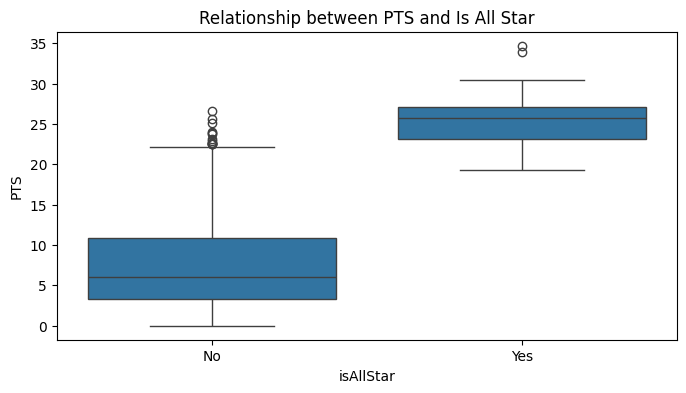

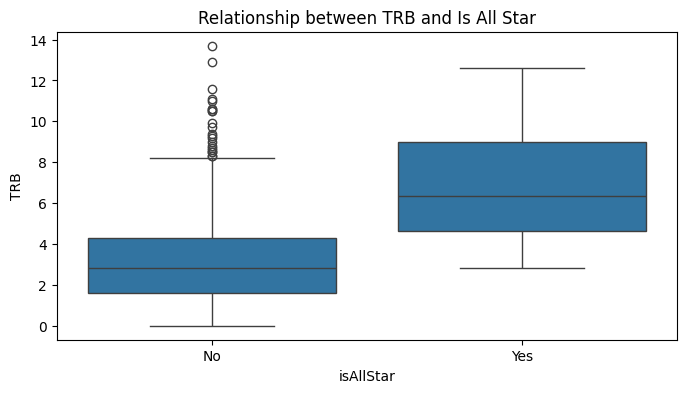

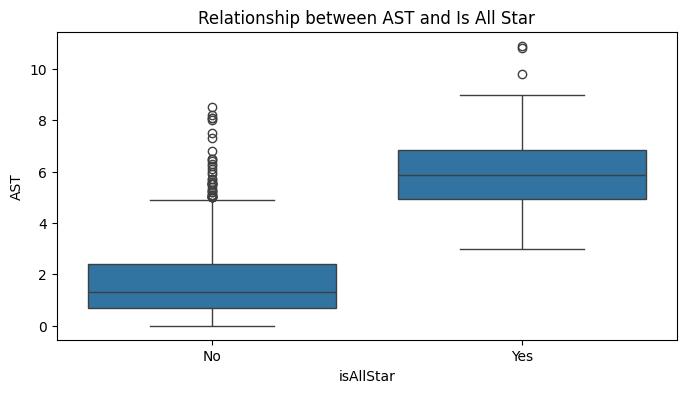

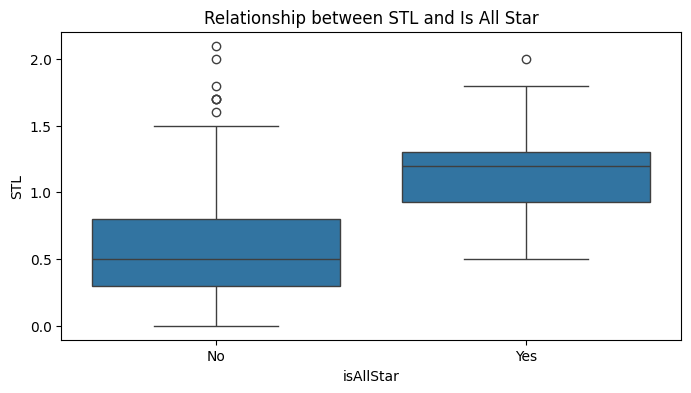

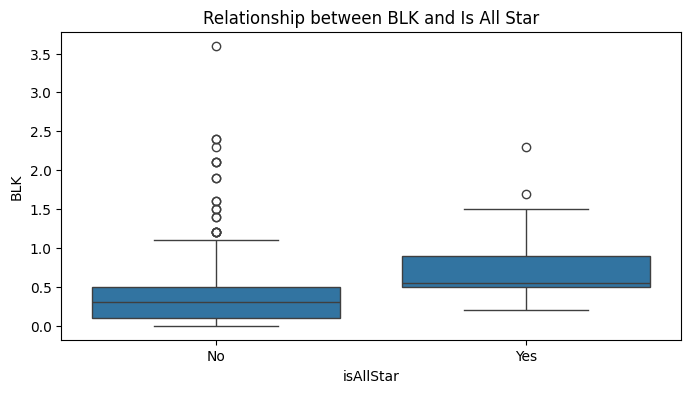

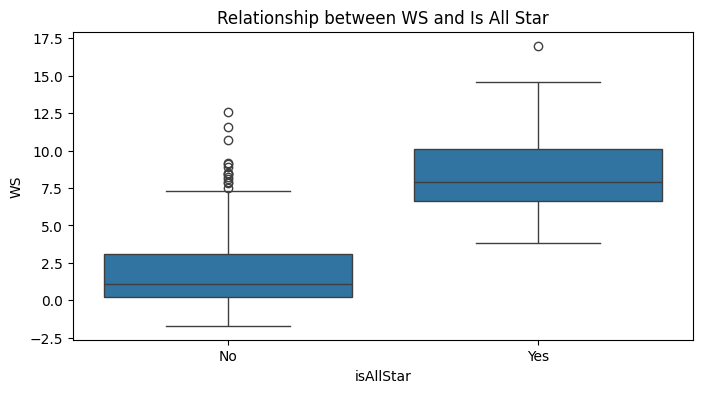

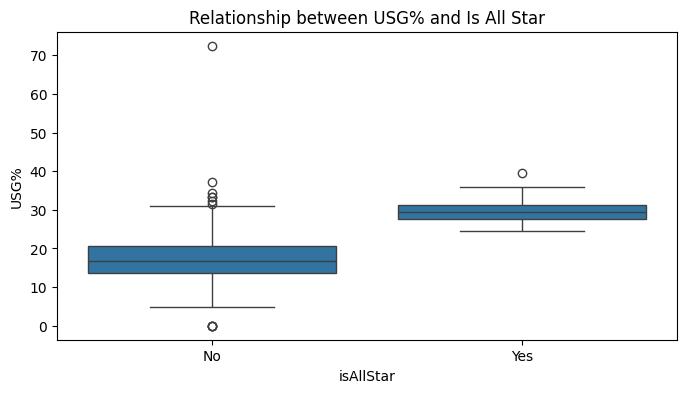

In [17]:


exp_variables = final_df.select_dtypes(include=[np.number]).columns.tolist()
for var in exp_variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='isAllStar', y=var, data=final_df)
    plt.title(f'Relationship between {var} and Is All Star')
    plt.show()


In [18]:
temp = pd.crosstab(final_df['Pos'], final_df['isAllStar'], normalize='index')
temp

isAllStar,No,Yes
Pos,,
C,0.957447,0.042553
C-PF,1.000000,0.000000
PF,0.926606,0.073394
PF-C,1.000000,0.000000
PF-SF,1.000000,0.000000
PG,0.913462,0.086538
PG-SG,1.000000,0.000000
SF,0.983471,0.016529
SF-PF,1.000000,0.000000


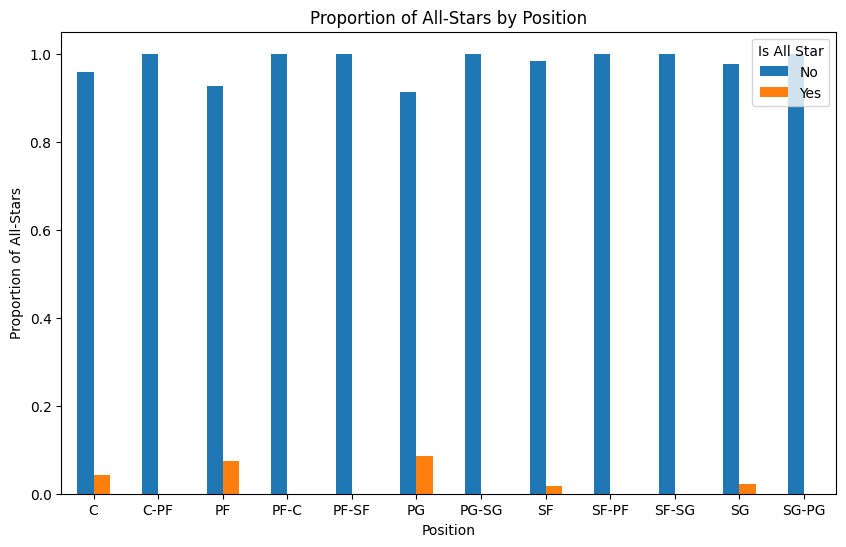

In [19]:
ax = temp.plot.bar(figsize=(10, 6))
plt.title('Proportion of All-Stars by Position')
plt.xlabel('Position')
plt.ylabel('Proportion of All-Stars')
plt.legend(title='Is All Star', loc='upper right')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


Relationships between Explanatory Variable Pairs

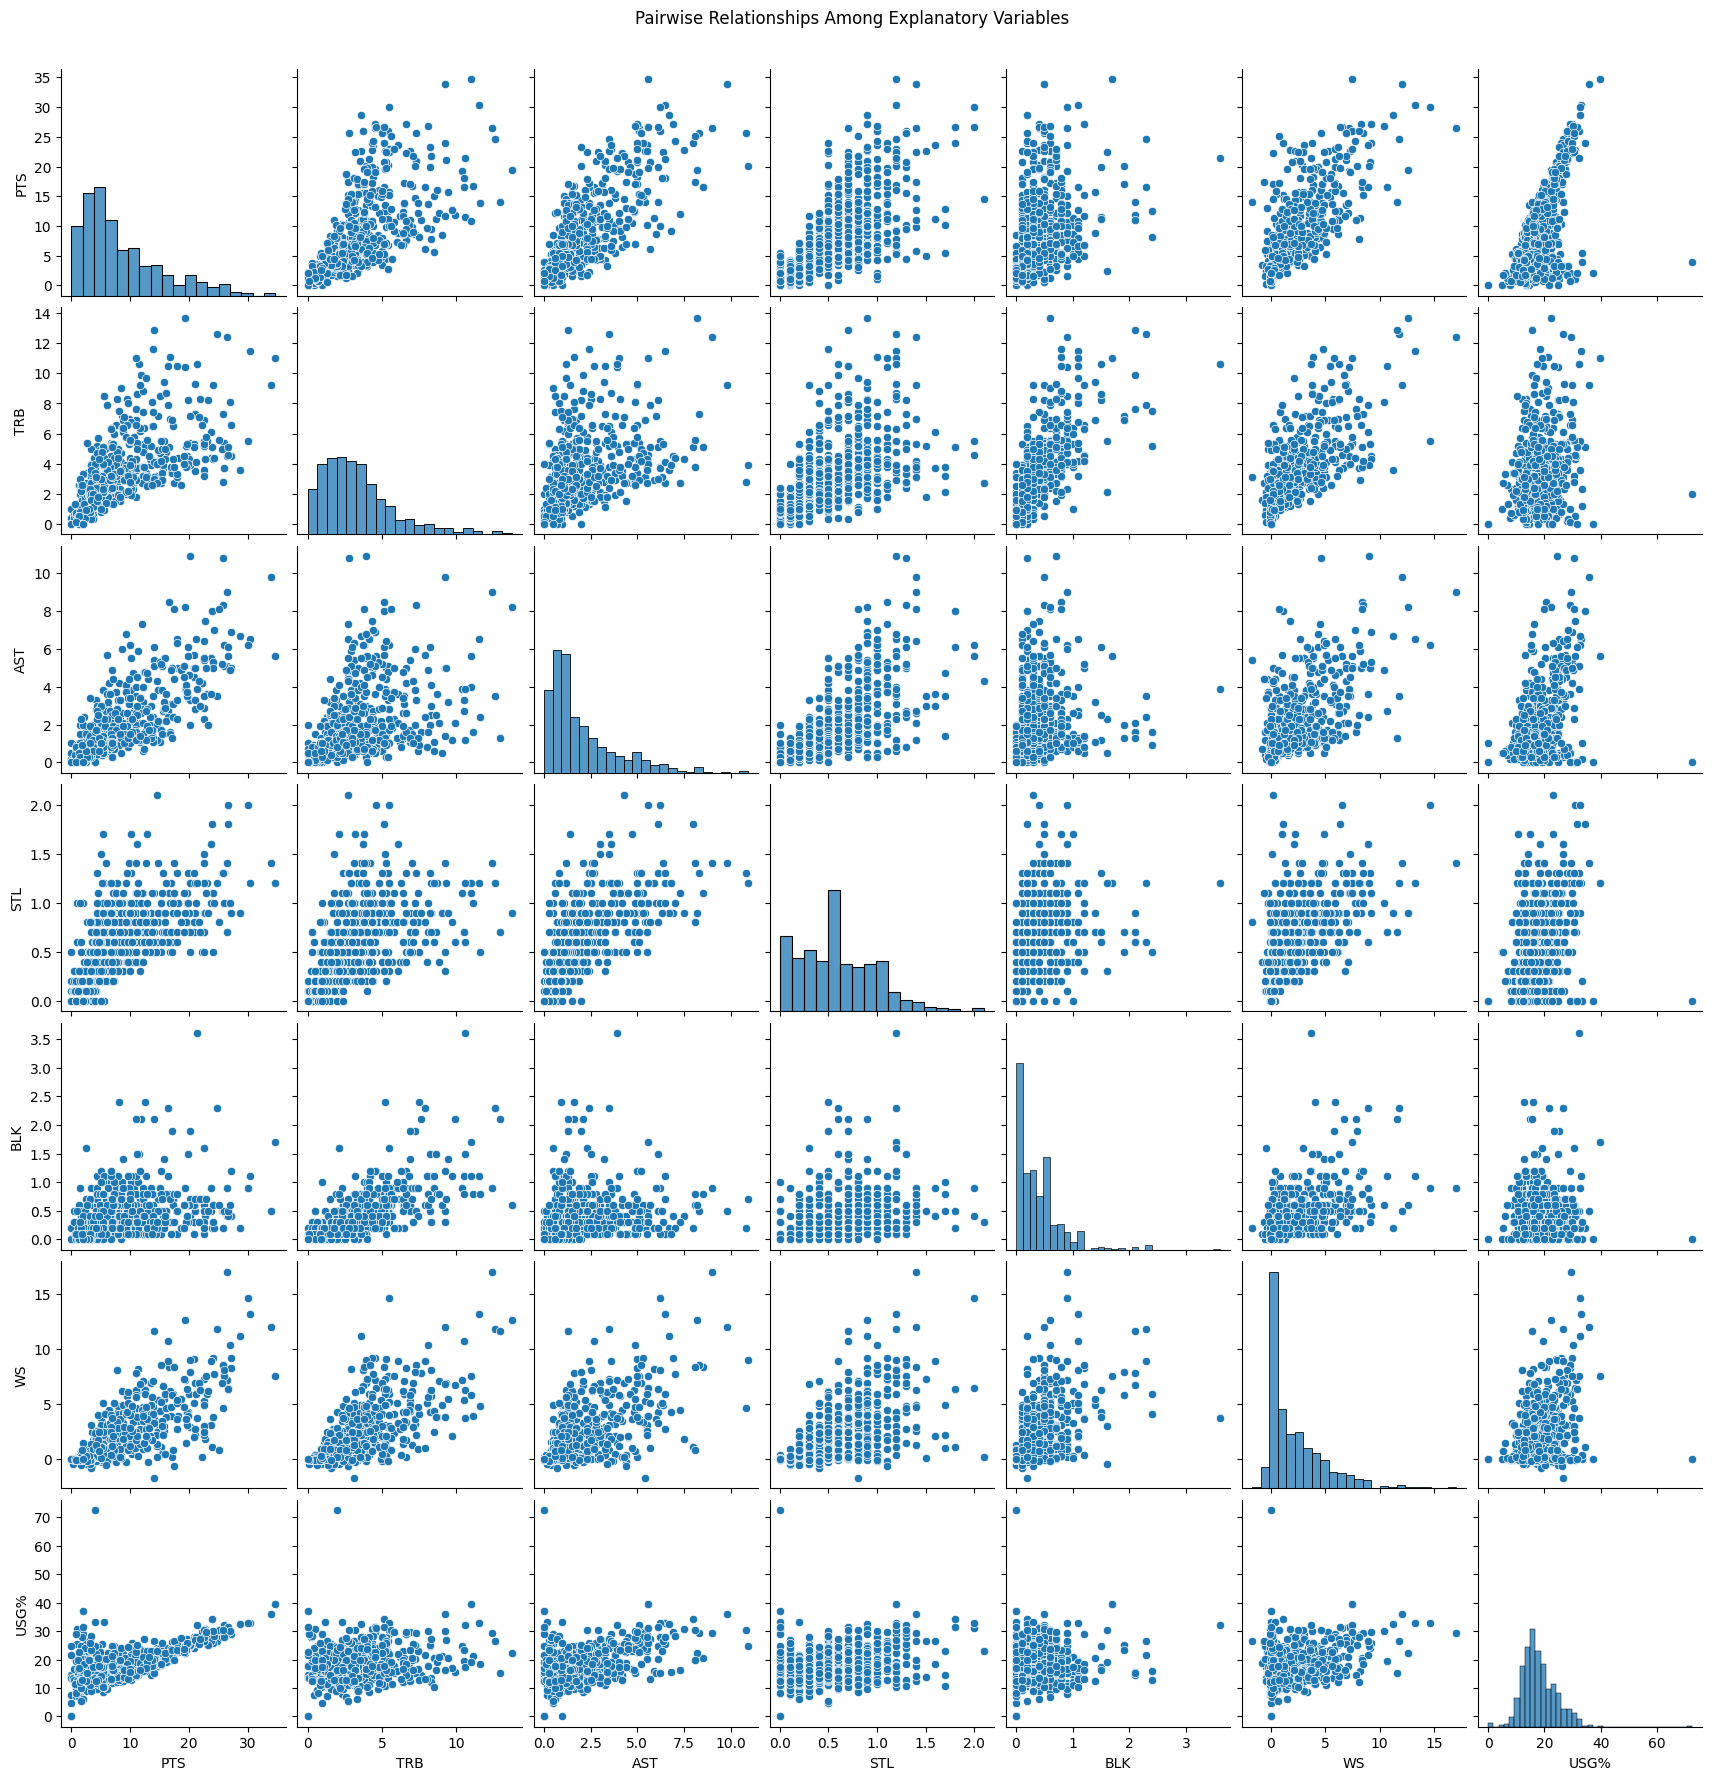

In [20]:
selected_columns = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'USG%']
sns.pairplot(final_df[selected_columns])
plt.suptitle('Pairwise Relationships Among Explanatory Variables', y=1.02)
plt.show()


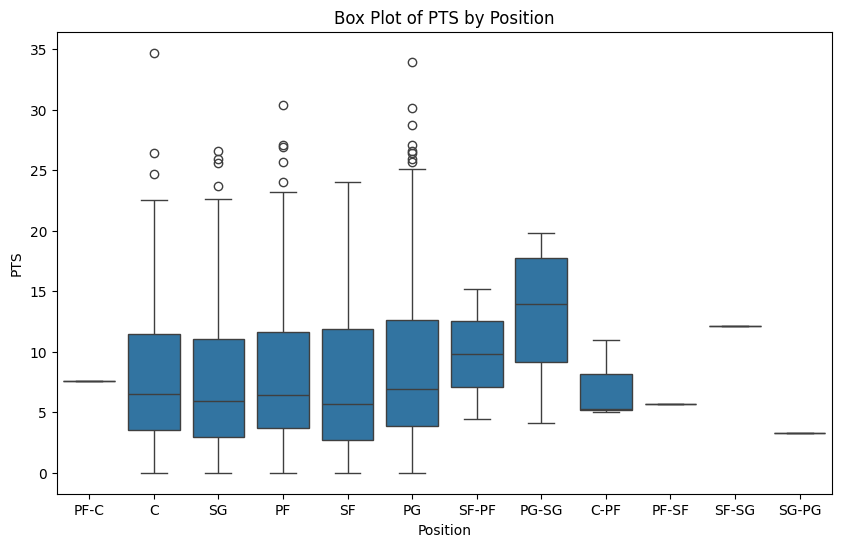

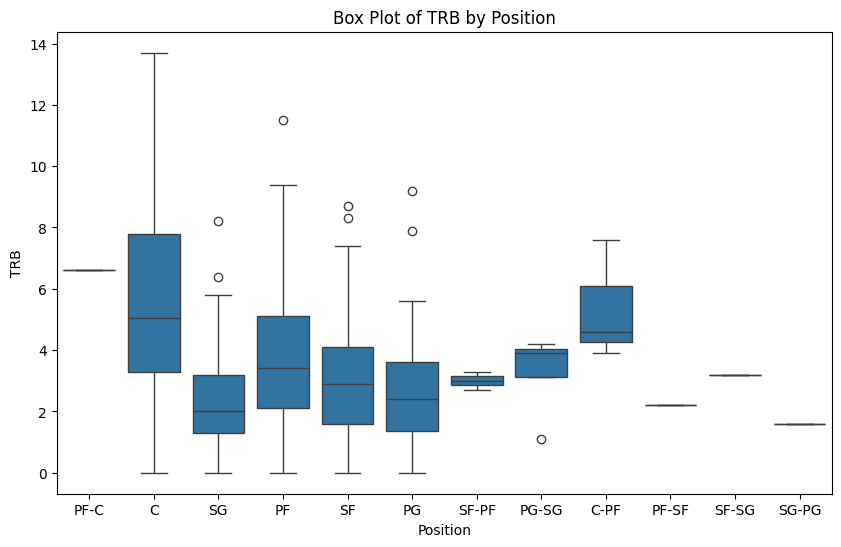

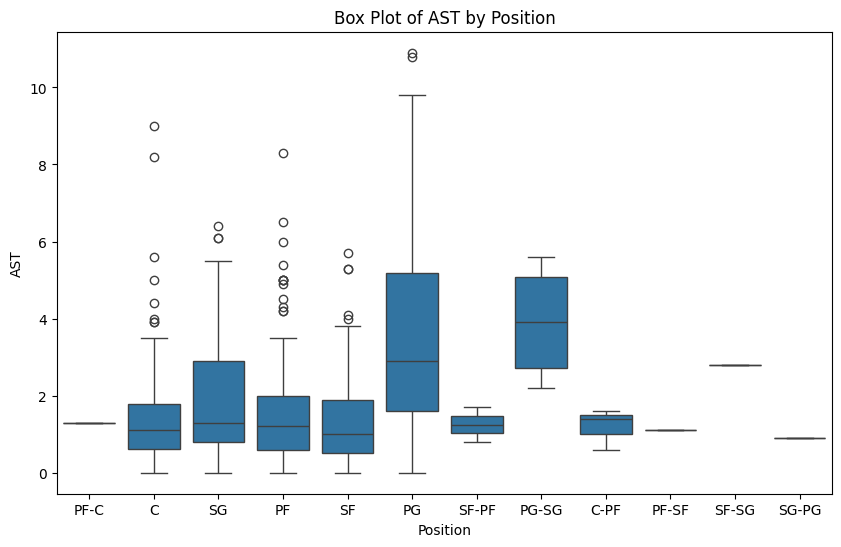

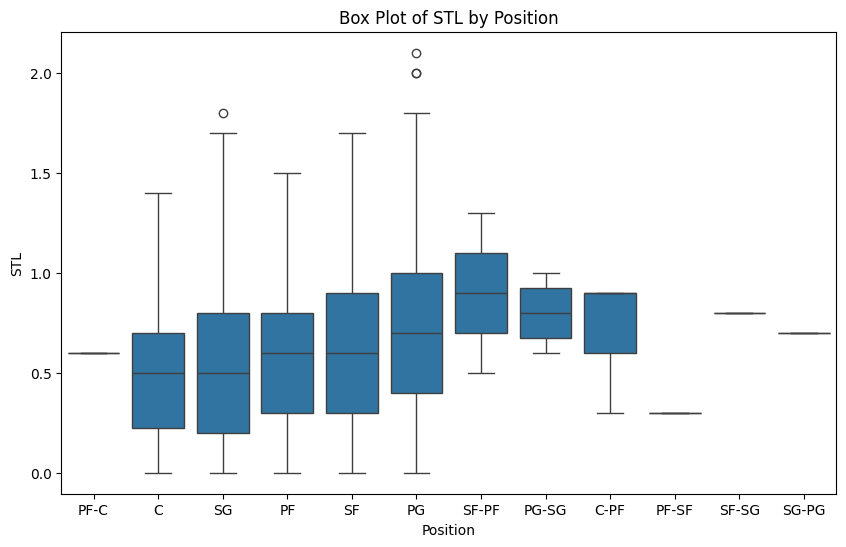

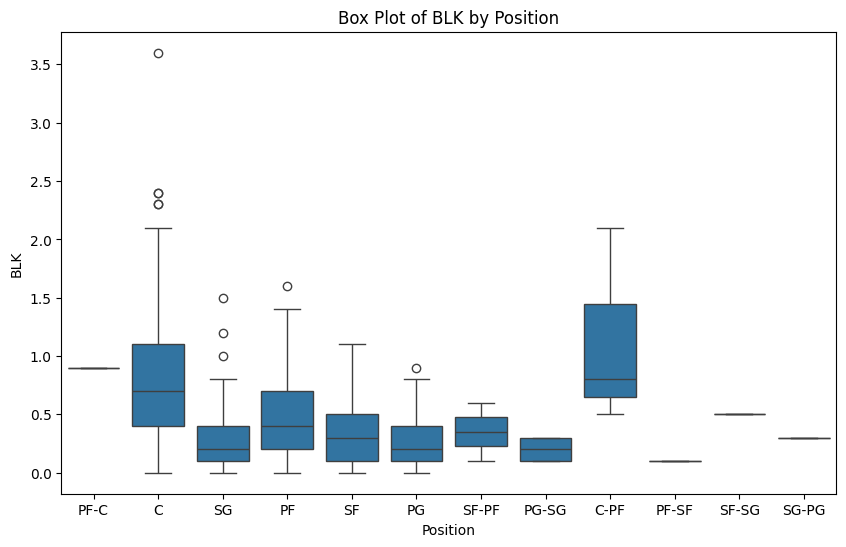

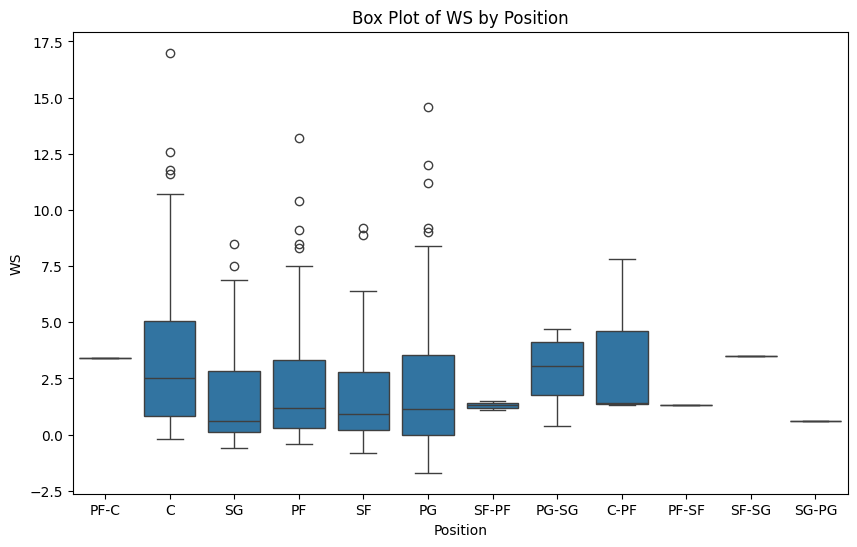

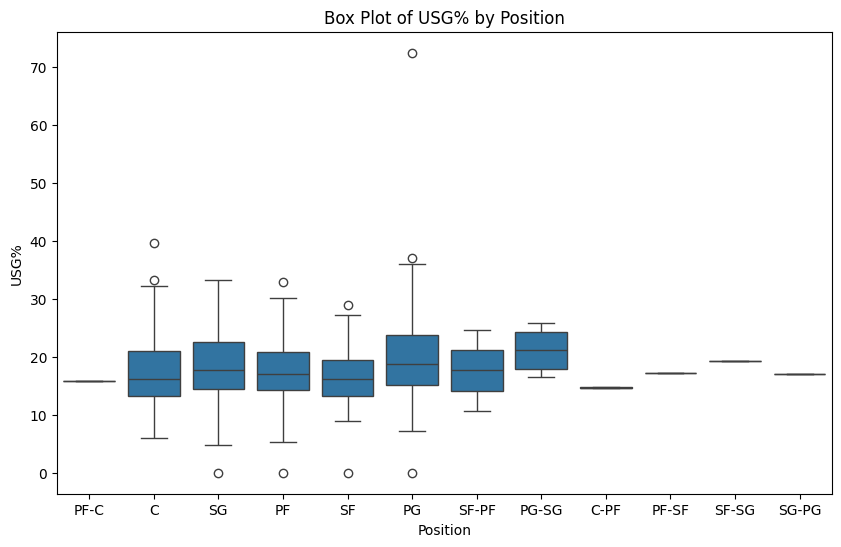

In [21]:
variables = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'USG%']

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Pos', y=var, data=final_df)
    plt.title(f'Box Plot of {var} by Position')
    plt.xlabel('Position')
    plt.ylabel(var)
    plt.show()

In [22]:
final_df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'USG%']].corr()

,PTS,TRB,AST,STL,BLK,WS,USG%
PTS,1.000000,0.664955,0.781182,0.678790,0.402661,0.759278,0.623389
TRB,0.664955,1.000000,0.451020,0.517584,0.700256,0.709344,0.268465
AST,0.781182,0.451020,1.000000,0.667829,0.190506,0.629958,0.456307
STL,0.678790,0.517584,0.667829,1.000000,0.357374,0.579261,0.269716
BLK,0.402661,0.700256,0.190506,0.357374,1.000000,0.515448,0.096202
WS,0.759278,0.709344,0.629958,0.579261,0.515448,1.000000,0.322115
USG%,0.623389,0.268465,0.456307,0.269716,0.096202,0.322115,1.000000


There were pairs of explanatory variables that had strong associations with each other such as (AST,PTS) (PTS,WS) (TRB,BLK) (TRB,WS) (TRB, Pos) (AST, POS) and (BLK,Pos). We can see in the correlation matrix that there are some strong linear relationships between variables that could lead to issues with multicolineatiry. Additionally in our boxplots you can see that there are at least 2 IQR boxes that are well-separated.

In [23]:
final_df['isAllStar']

0       No
1      Yes
2       No
3       No
4       No
      ... 
567     No
568    Yes
569     No
570     No
571     No
Name: isAllStar, Length: 572, dtype: object

In [24]:
final_df['y'] = final_df['isAllStar'].map({'Yes': 1, 'No': 0})
final_df

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK,WS,USG%,isAllStar,y
0,Precious Achiuwa,TOT,PF-C,7.6,6.6,1.3,0.6,0.9,3.4,15.9,No,0
1,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9,7.2,24.9,Yes,1
2,Ochai Agbaji,TOT,SG,5.8,2.8,1.1,0.6,0.6,0.1,13.4,No,0
3,Santi Aldama,MEM,PF,10.7,5.8,2.3,0.7,0.9,2.4,17.9,No,0
4,Nickeil Alexander-Walker,MIN,SG,8.0,2.0,2.5,0.8,0.5,4.3,14.8,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,TOT,PF,4.2,3.1,1.7,0.7,0.2,1.3,12.6,No,0
568,Trae Young,ATL,PG,25.7,2.8,10.8,1.3,0.2,4.6,30.5,Yes,1
569,Omer Yurtseven,UTA,C,4.6,4.3,0.6,0.2,0.4,0.7,17.9,No,0
570,Cody Zeller,NOP,C,1.8,2.6,0.9,0.2,0.1,0.8,12.9,No,0


In [25]:
positions = ['PG', 'SG', 'SF', 'PF', 'C']
pos_df = final_df[final_df['Pos'].isin(positions)]
pos_df

,Player,Tm,Pos,PTS,TRB,AST,STL,BLK,WS,USG%,isAllStar,y
1,Bam Adebayo,MIA,C,19.3,10.4,3.9,1.1,0.9,7.2,24.9,Yes,1
2,Ochai Agbaji,TOT,SG,5.8,2.8,1.1,0.6,0.6,0.1,13.4,No,0
3,Santi Aldama,MEM,PF,10.7,5.8,2.3,0.7,0.9,2.4,17.9,No,0
4,Nickeil Alexander-Walker,MIN,SG,8.0,2.0,2.5,0.8,0.5,4.3,14.8,No,0
5,Grayson Allen,PHO,SG,13.5,3.9,3.0,0.9,0.6,6.9,14.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,TOT,PF,4.2,3.1,1.7,0.7,0.2,1.3,12.6,No,0
568,Trae Young,ATL,PG,25.7,2.8,10.8,1.3,0.2,4.6,30.5,Yes,1
569,Omer Yurtseven,UTA,C,4.6,4.3,0.6,0.2,0.4,0.7,17.9,No,0
570,Cody Zeller,NOP,C,1.8,2.6,0.9,0.2,0.1,0.8,12.9,No,0


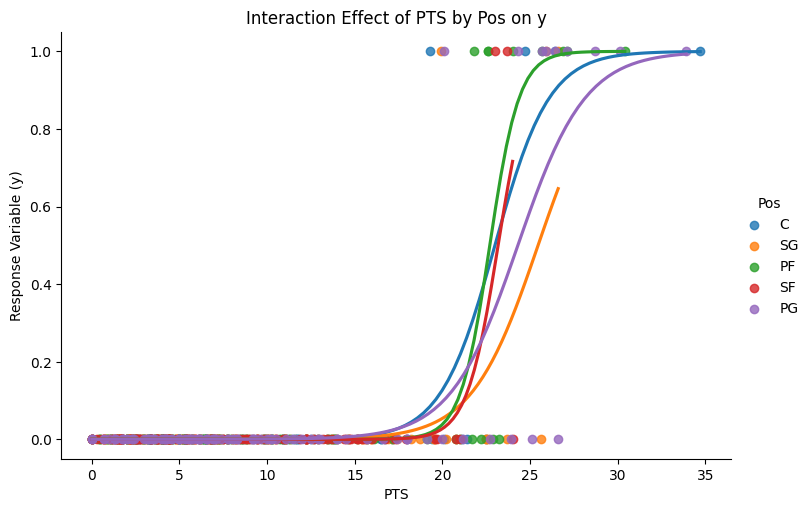

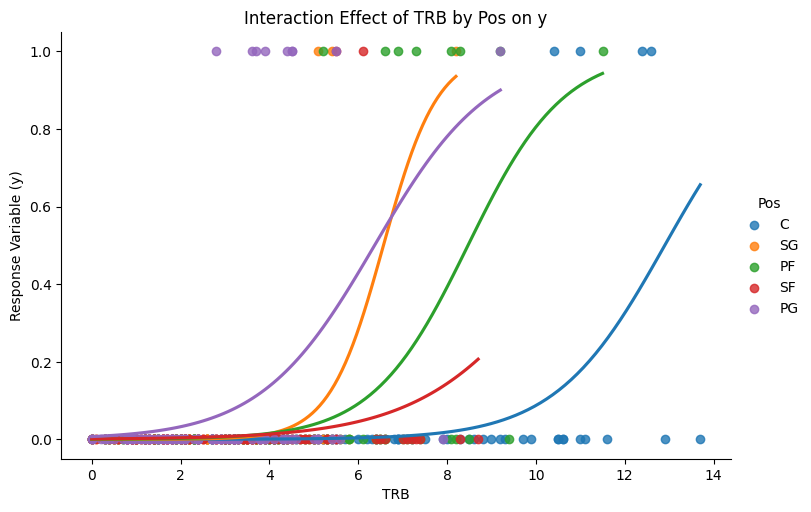

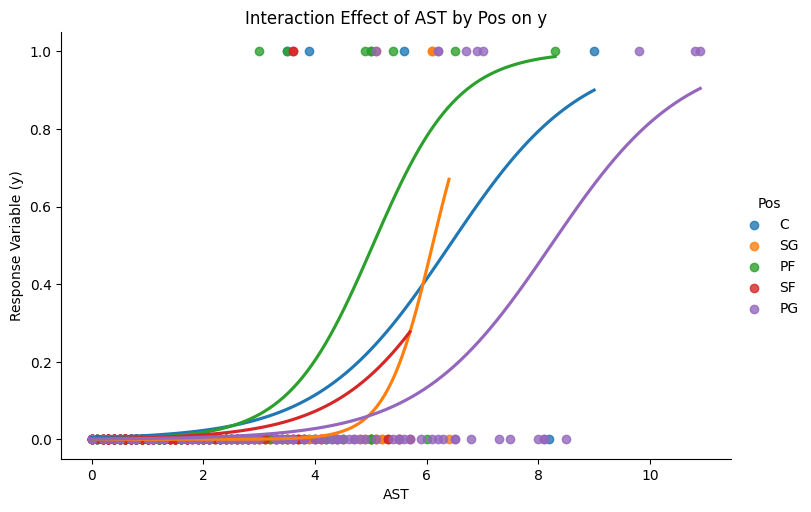

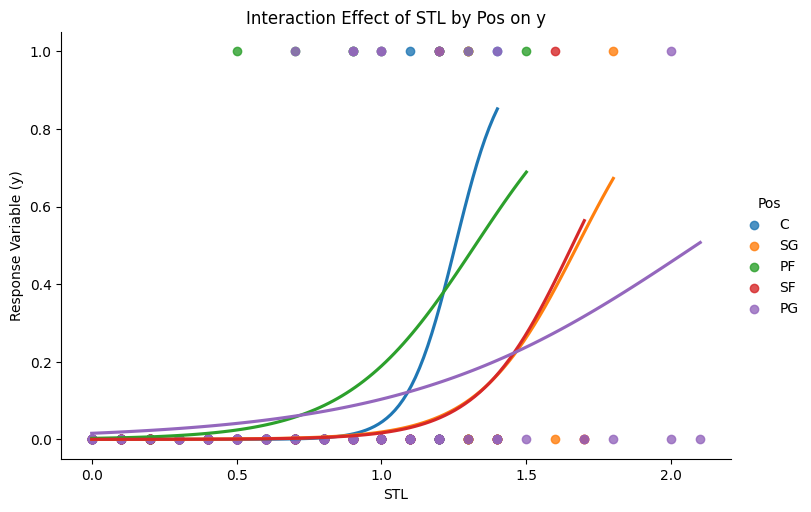

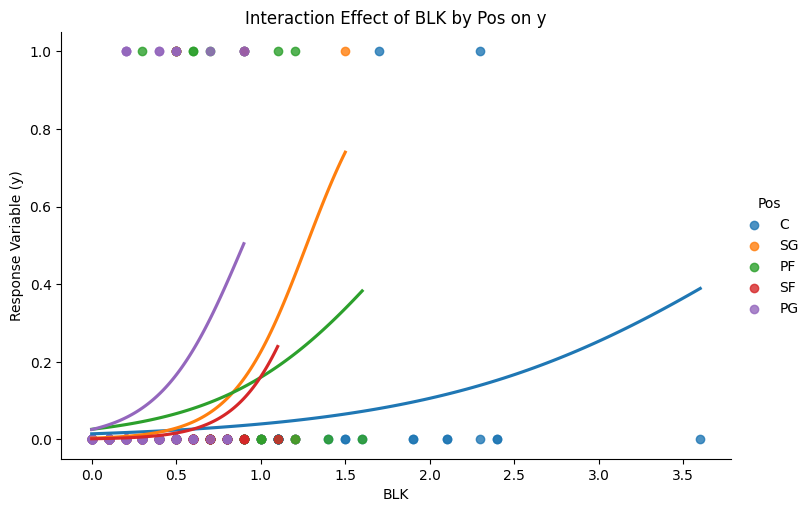

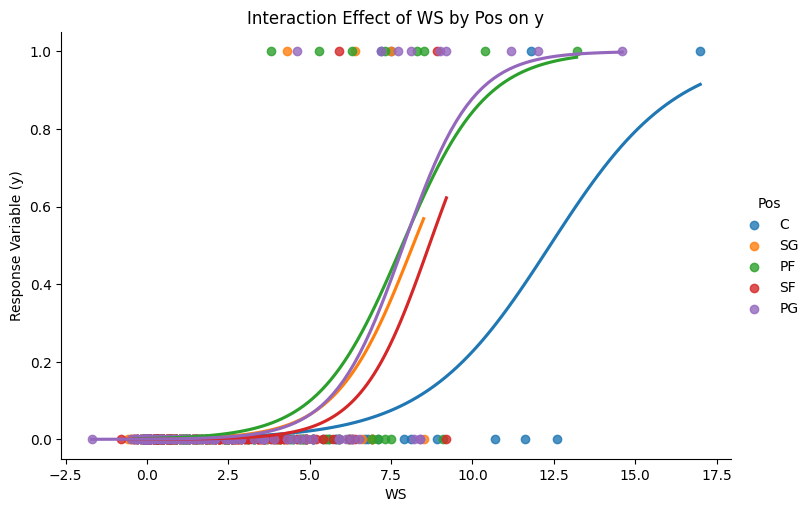

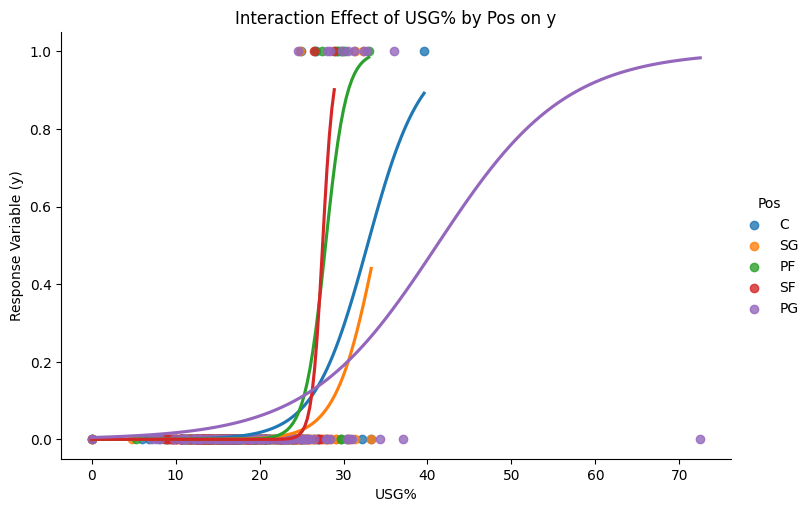

In [26]:
numerical_vars = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'USG%']
categorical_var = 'Pos'

for num_var in numerical_vars:
    sns.lmplot(x=num_var, y='y', hue=categorical_var, data=pos_df, logistic=True, ci=False, aspect=1.5)
    plt.title(f'Interaction Effect of {num_var} by {categorical_var} on y')
    plt.xlabel(num_var)
    plt.ylabel('Response Variable (y)')
    plt.show()

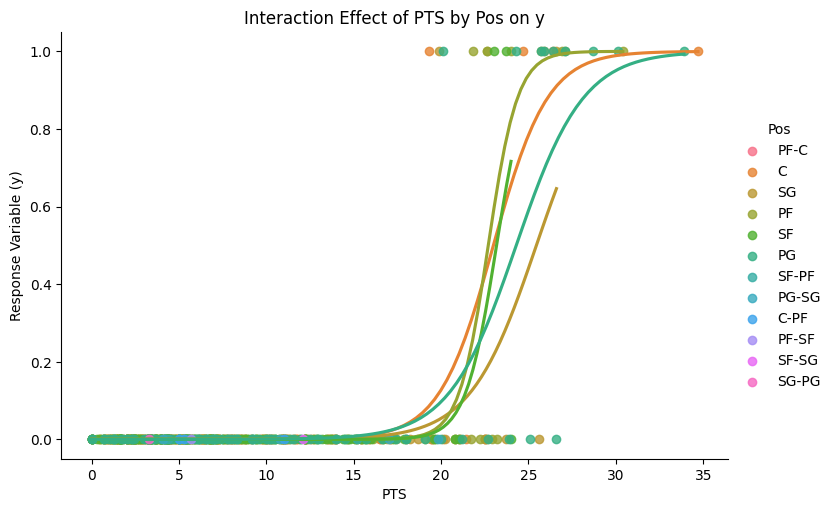

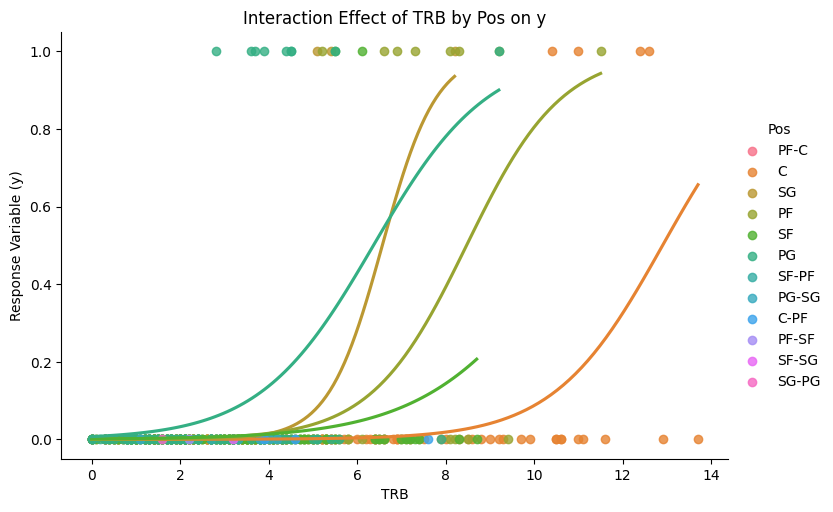

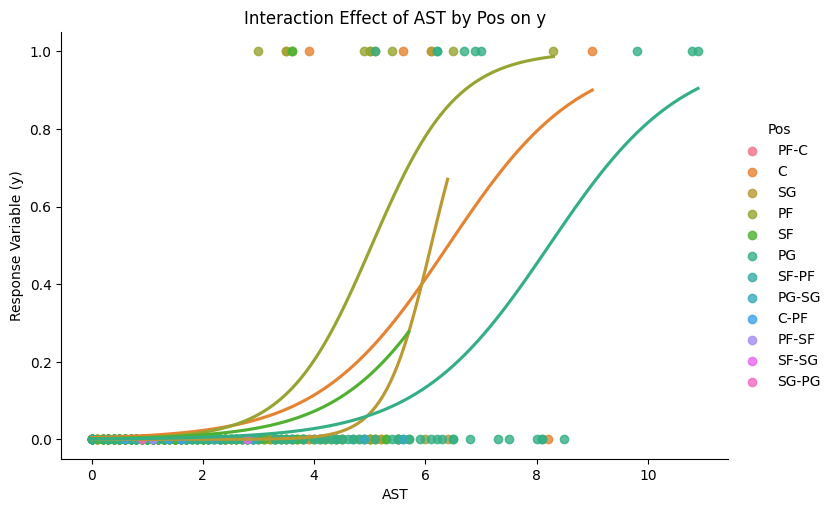

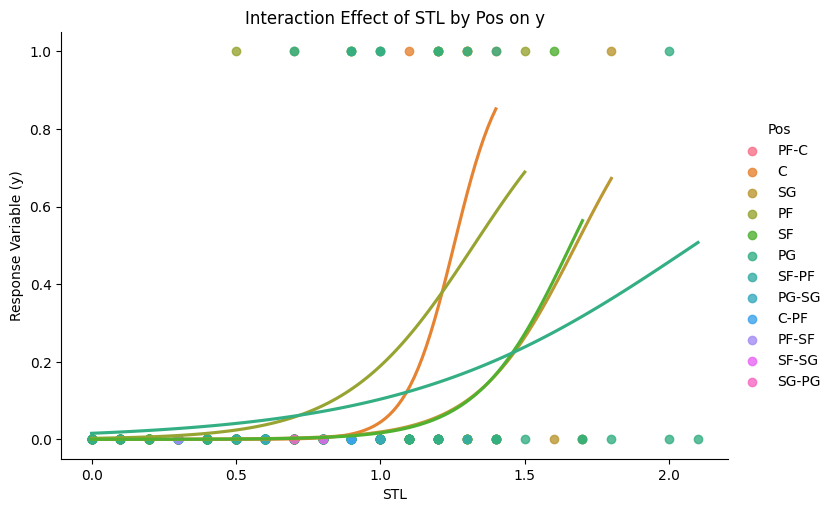

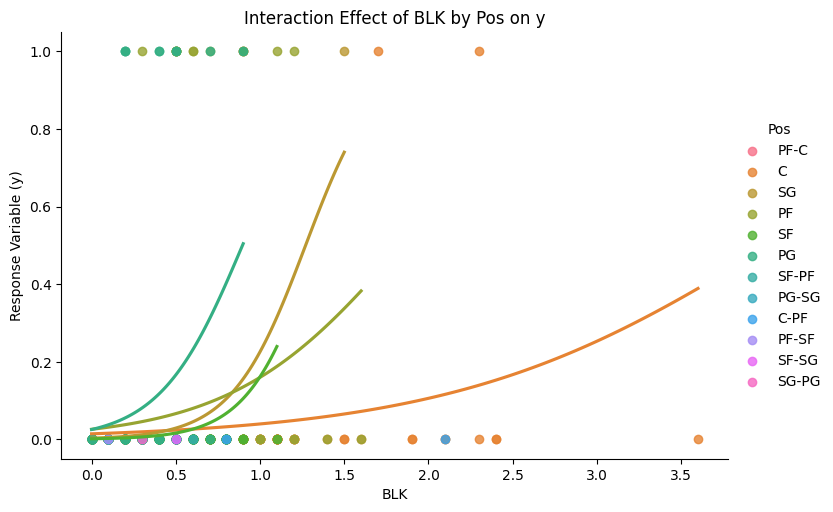

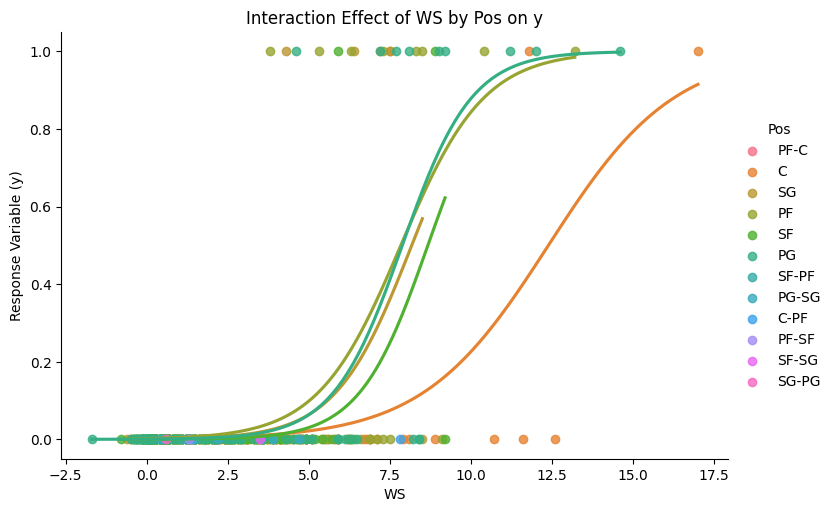

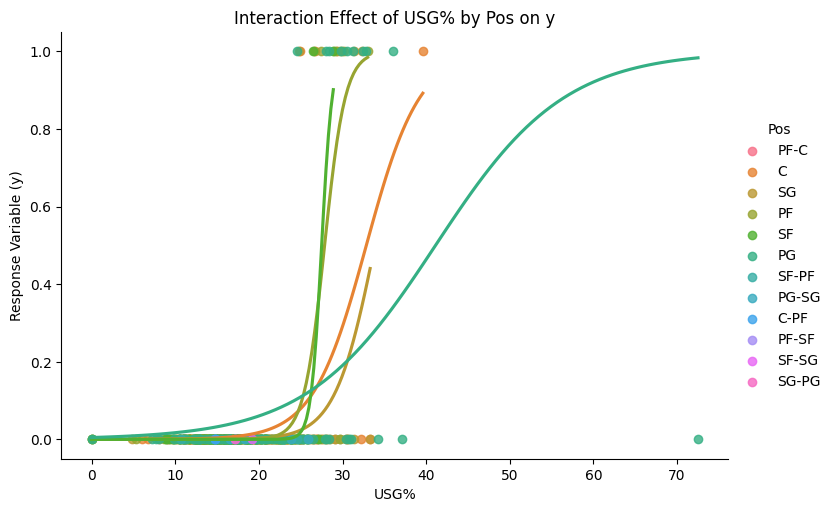

In [27]:
numerical_vars = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'USG%']
categorical_var = 'Pos'

for num_var in numerical_vars:
    sns.lmplot(x=num_var, y='y', hue=categorical_var, data=final_df, logistic=True, ci=False, aspect=1.5)
    plt.title(f'Interaction Effect of {num_var} by {categorical_var} on y')
    plt.xlabel(num_var)
    plt.ylabel('Response Variable (y)')
    plt.show()


From the plots, it seems that there is interaction between every pair of numerical and categorical explanatory varibales that impacts the predicted response variable isAllStar

## 5. Model Data Preprocessing

In [28]:
X = final_df.drop('y', axis=1)  # Assuming 'isAllStar' is the response variable
y = final_df['y']


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS', 'USG%']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [30]:
X = pd.get_dummies(X, columns=['Pos'], drop_first=True, dtype=int)


In [31]:
X

,Player,Tm,PTS,TRB,AST,STL,BLK,WS,USG%,isAllStar,...,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SF-SG,Pos_SG,Pos_SG-PG
0,Precious Achiuwa,TOT,-0.121326,1.331655,-0.374724,0.022427,1.204313,0.448914,-0.358587,No,...,0,1,0,0,0,0,0,0,0,0
1,Bam Adebayo,MIA,1.602947,2.899801,1.014334,1.305252,1.204313,1.880485,1.073203,Yes,...,0,0,0,0,0,0,0,0,0,0
2,Ochai Agbaji,TOT,-0.386598,-0.236492,-0.481575,0.022427,0.477660,-0.794293,-0.756307,No,...,0,0,0,0,0,0,0,0,1,0
3,Santi Aldama,MEM,0.335533,1.001519,0.159529,0.278992,1.204313,0.072184,-0.040412,No,...,1,0,0,0,0,0,0,0,0,0
4,Nickeil Alexander-Walker,MIN,-0.062376,-0.566628,0.266379,0.535557,0.235442,0.787970,-0.533584,No,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,TOT,-0.622396,-0.112691,-0.161023,0.278992,-0.491210,-0.342218,-0.883577,No,...,1,0,0,0,0,0,0,0,0,0
568,Trae Young,ATL,2.546138,-0.236492,4.700681,1.818382,-0.491210,0.900989,1.964095,Yes,...,0,0,0,1,0,0,0,0,0,0
569,Omer Yurtseven,UTA,-0.563447,0.382513,-0.748702,-1.003833,-0.006775,-0.568255,-0.040412,No,...,0,0,0,0,0,0,0,0,0,0
570,Cody Zeller,NOP,-0.976093,-0.319026,-0.588426,-1.003833,-0.733428,-0.530582,-0.835851,No,...,0,0,0,0,0,0,0,0,0,0


## 6. Feature Selection with k-Fold Cross-Validation

In [32]:
l1_ratios = [0.1, 0.25, 0.5, 0.75, 0.9]
lambda_values = np.logspace(-4, 4, 100)
C_values = 1 / lambda_values


auc_scores = {l1_ratio: [] for l1_ratio in l1_ratios}
X_num = X.select_dtypes(include=[np.number])
for l1_ratio in l1_ratios:
    for C in C_values:
        model = LogisticRegression(penalty='elasticnet', solver='saga', C=C, l1_ratio=l1_ratio, max_iter=10000)
        cv_auc = cross_val_score(model, X_num, y, cv=5, scoring='roc_auc').mean()
        auc_scores[l1_ratio].append(cv_auc)

best_auc, best_lambda, best_l1_ratio = 0, 0, 0
for l1_ratio, scores in auc_scores.items():
    max_auc = max(scores)
    if max_auc > best_auc:
        best_auc = max_auc
        best_lambda = lambda_values[scores.index(max_auc)]
        best_l1_ratio = l1_ratio

best_C = 1 / best_lambda


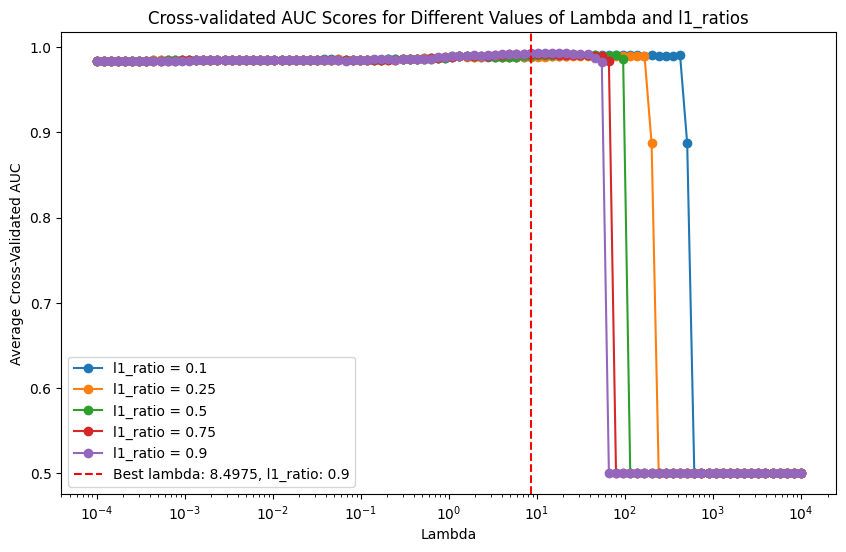

In [33]:

plt.figure(figsize=(10, 6))
for l1_ratio, scores in auc_scores.items():
    plt.plot(lambda_values, scores, marker='o', label=f'l1_ratio = {l1_ratio}')

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Average Cross-Validated AUC')
plt.title('Cross-validated AUC Scores for Different Values of Lambda and l1_ratios')
plt.axvline(x=best_lambda, color='red', linestyle='--', label=f'Best lambda: {best_lambda:.4f}, l1_ratio: {best_l1_ratio}')
plt.legend()
plt.show()



In [34]:
print(f"The best lambda value is: {best_lambda}")
print(f"The best l1_ratio value is: {best_l1_ratio}")
print(f"This combination gives an average cross-validated AUC of: {best_auc}")

The best lambda value is: 8.497534359086455
The best l1_ratio value is: 0.9
This combination gives an average cross-validated AUC of: 0.993179872115652


We chose to use Elastic Net as our regularization model because of its ability to handle multicollinearity the best and also allows us to reap the benefits of Lasso's feature selection and Ridge's complexity. We saw in our heatmap that multicollinearity may be an issue but also feel that all of the predictors we chose are expected to be useful in determining whether a player will be an all star or not so we want to avoid zeroing out anything if possible. The problem with only choosing Lasso is that if there are 2 predictors that are equally good in predicting the target variable, Lasso might arbitrarily select one of these features, while Elastic Net tends to include all of them. We saw that after testing many combinations of l1 ratio's and lambdas that our best model had a AUC score of .993 which is phenomenal.

## 7. Best Model Discussion

In [35]:
# Train-Test-Split

X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.20, random_state=207)

In [36]:
# Fit the Chosen Model

best_model = LogisticRegression(penalty='elasticnet', solver='saga', C=best_C , l1_ratio=best_l1_ratio, max_iter=1000)
best_model.fit(X_train, y_train)

LogisticRegression(C=0.11768119524349968, l1_ratio=0.9, max_iter=1000,
                   penalty='elasticnet', solver='saga')

In [37]:
# Equation

intercept = best_model.intercept_[0]
coefficients = best_model.coef_[0]
feature_names = X_num.columns

equation_terms = [f"{coef:.3f}*{feature_names[i]}" for i, coef in enumerate(coefficients) if coef != 0]
equation = " + ".join(equation_terms)

logistic_regression_equation = f"Logistic Regression Equation: P(Y=1) = 1 / (1 + exp(-({intercept:.3f} + {equation})))"
print(logistic_regression_equation)

Logistic Regression Equation: P(Y=1) = 1 / (1 + exp(-(-4.870 + 1.278*PTS + 0.276*AST + 0.422*WS)))


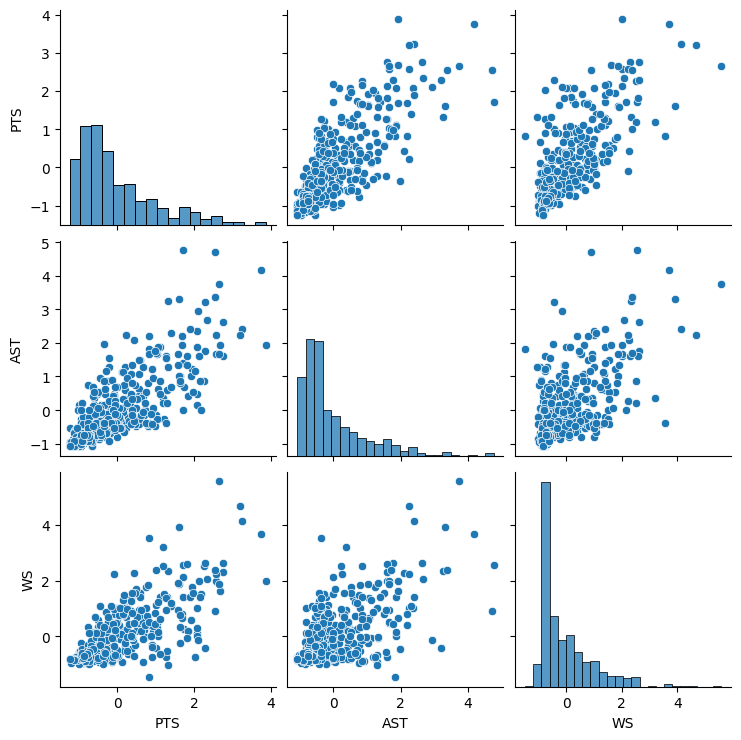

In [38]:
# Multicollinearity
sns.pairplot(X_train[['PTS', 'AST', 'WS']])
plt.show()

In [39]:
# Multicollinearity & Slope Interpretations

X_train[['PTS', 'AST', 'WS']].corr()

,PTS,AST,WS
PTS,1.000000,0.791630,0.757943
AST,0.791630,1.000000,0.636694
WS,0.757943,0.636694,1.000000


In [40]:
# Slope Interpretations

X_train[['PTS', 'AST', 'WS']].describe()

,PTS,AST,WS
count,457.000000,457.000000,457.000000
mean,-0.052992,-0.045405,-0.038526
std,0.982676,0.986336,1.003439
min,-1.241366,-1.069254,-1.472405
25%,-0.755033,-0.695276,-0.756620
50%,-0.342386,-0.428150,-0.417564
75%,0.379745,0.319805,0.411241
max,3.872501,4.754106,5.572432


In [41]:
# Outer join merge on X_train and y_train to create df_train

df_train = pd.concat([X_train, y_train], axis = 1)
df_train['isAllStar'] = df_train['y'].map({1: 'Yes', 0: 'No'})
df_train.head()

,PTS,TRB,AST,STL,BLK,WS,USG%,Pos_C-PF,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SF-SG,Pos_SG,Pos_SG-PG,y,isAllStar
370,0.114472,-0.525361,1.121184,0.792122,-0.733428,-0.078507,-0.342678,0,0,0,0,1,0,0,0,0,0,0,0,No
461,1.956643,1.537990,1.228035,0.535557,-0.248993,1.767466,1.136838,0,1,0,0,0,0,0,0,0,0,0,0,No
455,-0.136063,-0.071424,-0.161023,-0.490703,-0.491210,-0.944984,0.341399,0,0,0,0,0,0,1,0,0,0,0,0,No
556,-0.239225,1.207854,-0.641851,1.561817,1.930965,-0.681274,-0.788124,0,0,0,0,0,0,0,0,0,0,0,0,No
514,1.322937,0.176178,3.258197,2.074947,0.962095,2.332560,0.245946,0,0,0,0,1,0,0,0,0,0,0,0,No


In [42]:
# Outer join merge on X_test and y_test to create df_test

df_test = pd.concat([X_test, y_test], axis = 1)
df_test['isAllStar'] = df_test['y'].map({1: 'Yes', 0: 'No'})
df_test.head()

,PTS,TRB,AST,STL,BLK,WS,USG%,Pos_C-PF,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SF-SG,Pos_SG,Pos_SG-PG,y,isAllStar
150,0.306058,0.134911,-0.267874,0.278992,-0.248993,-0.040834,-0.263135,0,0,0,0,0,0,1,0,0,0,0,0,No
497,1.396623,-0.030157,0.159529,0.022427,0.235442,0.524260,0.961841,0,0,0,0,0,0,1,0,0,0,0,0,No
36,1.440836,0.423780,1.602012,1.048687,0.235442,0.637278,0.723210,0,0,0,0,0,0,0,0,0,1,0,0,No
167,2.089280,0.753917,0.800633,2.331512,0.235442,1.918158,1.343652,0,1,0,0,0,0,0,0,0,0,0,1,Yes
269,0.527119,-0.277759,2.830795,1.305252,-0.248993,0.863316,-0.294952,0,0,0,0,1,0,0,0,0,0,0,0,No


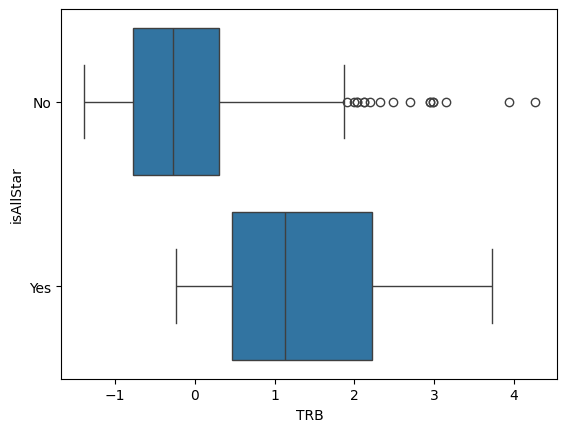

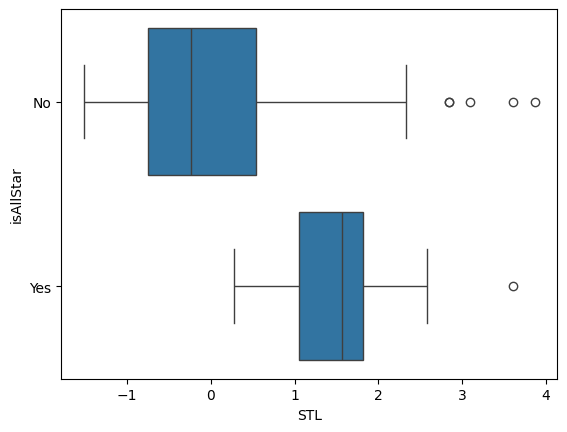

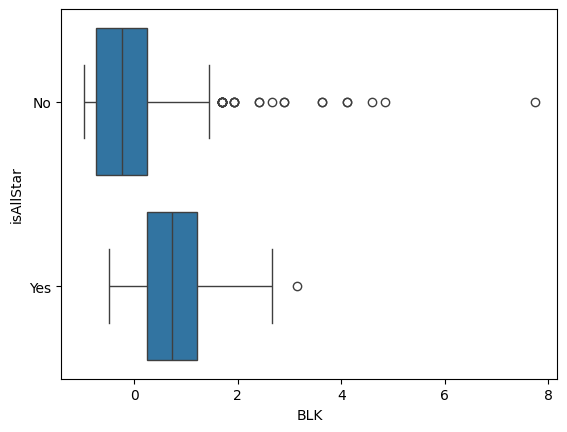

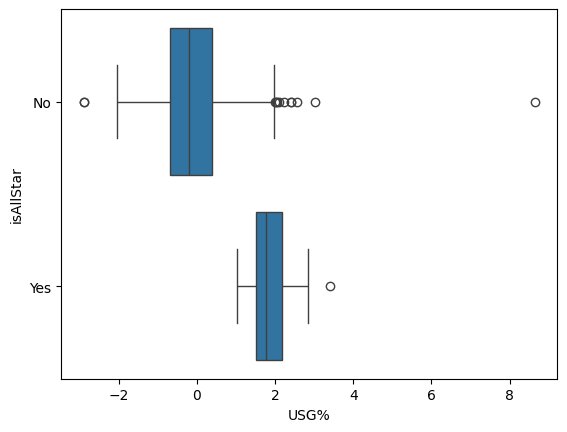

In [43]:
# Overfitting Explanatory Variables Strength

removed_variables = ['TRB', 'STL', 'BLK', 'USG%']
for col in df_train[removed_variables]:
    sns.boxplot(x = col, y = 'isAllStar', data = df_train)
    plt.show()

In [44]:
# Overfitting Explanatory Variables Association with Model Explanatory Varaibles

X_train.corr()

,PTS,TRB,AST,STL,BLK,WS,USG%,Pos_C-PF,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SF-SG,Pos_SG,Pos_SG-PG
PTS,1.000000,0.670074,0.791630,0.683894,0.424654,0.757943,0.582322,-0.029003,0.024563,-0.003260,-0.016618,0.098196,0.068584,-0.074250,0.017283,0.028378,-0.062308,-0.033492
TRB,0.670074,1.000000,0.477024,0.541550,0.701155,0.718677,0.248222,0.028397,0.097723,0.067136,-0.021011,-0.150884,0.001053,-0.076876,-0.007056,-0.000978,-0.238594,-0.033031
AST,0.791630,0.477024,1.000000,0.667722,0.210099,0.636694,0.428838,-0.032946,-0.086249,-0.015653,-0.020731,0.376806,0.101072,-0.152152,-0.023958,0.022437,-0.034758,-0.025810
STL,0.683894,0.541550,0.667722,1.000000,0.404082,0.587911,0.227404,0.005258,-0.024584,0.003714,-0.032915,0.132423,0.056452,0.004309,0.057116,0.028133,-0.070608,0.015923
BLK,0.424654,0.701155,0.210099,0.404082,1.000000,0.521137,0.099504,0.041372,0.084565,0.057795,-0.033637,-0.189341,-0.044562,-0.100297,-0.007170,0.012079,-0.195532,-0.010779
WS,0.757943,0.718677,0.636694,0.587911,0.521137,1.000000,0.284850,-0.018842,0.013831,0.022773,-0.014188,0.016591,0.024506,-0.078673,-0.020088,0.024533,-0.132830,-0.026509
USG%,0.582322,0.248222,0.428838,0.227404,0.099504,0.284850,1.000000,-0.036030,-0.041827,-0.016916,-0.007269,0.183908,0.044228,-0.148040,-0.005564,0.007571,0.031763,-0.008011
Pos_C-PF,-0.029003,0.028397,-0.032946,0.005258,0.041372,-0.018842,-0.036030,1.000000,-0.031921,-0.003105,-0.003105,-0.030772,-0.006230,-0.034865,-0.004396,-0.003105,-0.036210,-0.003105
Pos_PF,0.024563,0.097723,-0.086249,-0.024584,0.084565,0.013831,-0.041827,-0.031921,1.000000,-0.022547,-0.022547,-0.223466,-0.045242,-0.253185,-0.031921,-0.022547,-0.262958,-0.022547
Pos_PF-C,-0.003260,0.067136,-0.015653,0.003714,0.057795,0.022773,-0.016916,-0.003105,-0.022547,1.000000,-0.002193,-0.021735,-0.004400,-0.024626,-0.003105,-0.002193,-0.025576,-0.002193


In [49]:
# Test ROC and AUC

# Fit our best model
best_formula = 'y ~ PTS + AST + WS'
best_mod = smf.logit(formula = best_formula, data = df_train).fit()

# Calculuate model predictive probabilites
df_test['predictive_prob'] = best_mod.predict(df_test)
df_test[['predictive_prob', 'y']].head()

Optimization terminated successfully.
         Current function value: 0.040700
         Iterations 11


,predictive_prob,y
150,0.000128,0
497,0.010386,0
36,0.022561,0
167,0.317495,1
269,0.001849,0


In [54]:
# Calculate the FPR and TPR values for many predictive probability thresholds

from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_true = df_test['y'],
                                   y_score = df_test['predictive_prob'])
pd.DataFrame({'fpr': fprs, 'tpr': tprs})

,fpr,tpr
0,0.000000,0.000000
1,0.000000,0.142857
2,0.000000,0.571429
3,0.018519,0.571429
4,0.018519,1.000000
5,0.981481,1.000000
6,1.000000,1.000000


In [55]:
# Calculuate the AUC Score

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_true = df_test['y'],
                    y_score = df_test['predictive_prob'])
auc

0.9920634920634921

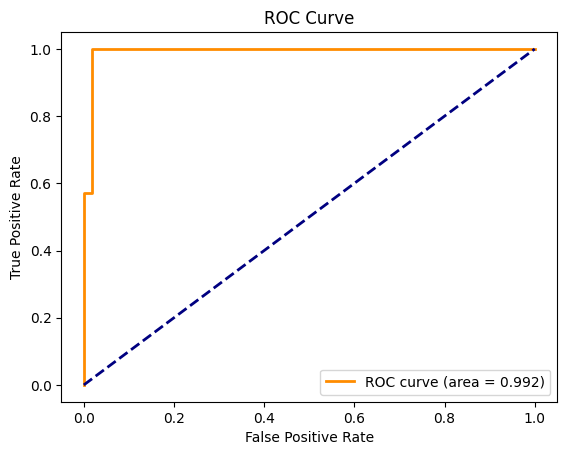

In [56]:
# Plot ROC Curve

def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color = 'darkorange', lw = lw,
             label = 'ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.show()

plot_roc(fprs, tprs, auc)

In [58]:
# Best Predictive Probability Threshold

from sklearn.metrics import confusion_matrix

def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1 * (pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true = y, y_pred = yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (tp + tn)
    return pd.DataFrame({'threshold': [thresh],
                         'fpr': [fpr],
                         'tpr': [tpr]})

for thresh in np.arange(0, 1.01, 0.01):
    print(fpr_tpr_thresh(df_test['y'], df_test['predictive_prob'], thresh))

   threshold        fpr  tpr
0        0.0  15.428571  1.0
   threshold       fpr  tpr
0       0.01  0.127451  1.0
   threshold       fpr  tpr
0       0.02  0.105769  1.0
   threshold       fpr  tpr
0       0.03  0.095238  1.0
   threshold       fpr  tpr
0       0.04  0.074766  1.0
   threshold       fpr  tpr
0       0.05  0.064815  1.0
   threshold       fpr  tpr
0       0.06  0.064815  1.0
   threshold       fpr  tpr
0       0.07  0.064815  1.0
   threshold       fpr  tpr
0       0.08  0.045455  1.0
   threshold       fpr  tpr
0       0.09  0.045455  1.0
   threshold       fpr  tpr
0        0.1  0.045455  1.0
   threshold       fpr  tpr
0       0.11  0.045455  1.0
   threshold       fpr  tpr
0       0.12  0.045455  1.0
   threshold       fpr  tpr
0       0.13  0.036036  1.0
   threshold       fpr  tpr
0       0.14  0.036036  1.0
   threshold       fpr  tpr
0       0.15  0.036036  1.0
   threshold       fpr  tpr
0       0.16  0.036036  1.0
   threshold       fpr  tpr
0       0.17  0.03

In [59]:
# Ideal classifier (optimizes tpr with smallest fpr)
fpr_tpr_thresh(df_test['y'], df_test['predictive_prob'], 0.26)

,threshold,fpr,tpr
0,0.26,0.017699,1.0


The remaining explanatory variables in this model might exhibit an issue with multicollinearity. There the numerical explanatory variable pairs PTS and AST, as well as PTS and WS have a correlation above 0.7.

The standard deviations of the explanatory variables are roughly similar to each other, so it would fair to make an interpretation on the strength of explanatory variables based on the slope magnitudes. However, because there are collinear numerical explanatory variables, the resulting slopes of our best logistic regression model might not accurately reflect the relationship between the variables in the dataset. We should be skeptical of using slope magnitudes to make these interpretations. If we did use slope magnitudes to interpret which explanatory variable is most important, we would find that PTS is the most important explanatory varible when it comes to predicting if an NBA player is an All-Star because it has the greatest slope magnitude.

The fact that our "best model" only includes PTS, AST, and WS does sugest that some of our original explanatory variables may have been overfiting the model. These variables are TRB, STL, BLK, USG%, and all the Position indicator variables. By looking at the boxplots of these variables, we can actually see that a lot of the variables that were dropped do have a strong association with isAllStar. The set of IQR boxes for TRB, STL, and USG% have no overlap at all. The overfitting explanatory variable TRB is strongly associated with another explanatory variable that is still left in the model, WS, as they have a correlation above 0.7.

Our ROC curve is pretty close to resembling the ideal ROC curve, where FPR = 0 and TPR = 1. Our AUC is 0.992, which is close to the ideal classification of 1. There exists some predictive probability threshold which will get us very close to the ideal classification (fpr, tpr) = (0, 1).

For our best predictive probability threshold of 0.26, the test FPR is 0.017699 and the test TPR is 1.0. In context of our research analysis, a test FPR of 0.017699 means that our model will incorrectly predict that an NBA player is an All Star, when they actually are not an All Star. A test TNR of 1.0 means that our model will correctly predict that an NBA player is an All Star, when they are actually an All Star.

## 8. Additional Analysis/Insight

For our additional analysis, we will evaluate the parsimoniousness of our logistic regression model, in comparison to if we used a full model with all explanatory and indicator variables.

In [60]:
# Rename columns to they can be used in fitting models
df_train = df_train.rename(columns = {'USG%': 'USG',
                                      'Pos_C-PF': 'Pos_C_PF',
                                      'Pos_PF-C': 'Pos_PF_C',
                                      'Pos_PF-SF': 'Pos_PF_SF',
                                      'Pos_PG-SG': 'Pos_PG_SG',
                                      'Pos_SF-PF': 'Pos_SF_PF',
                                      'Pos_SF-SG': 'Pos_SF_SG',
                                      'Pos_SG-PG': 'Pos_SG_PG',
                                      })
df_train.head()

,PTS,TRB,AST,STL,BLK,WS,USG,Pos_C_PF,Pos_PF,Pos_PF_C,Pos_PF_SF,Pos_PG,Pos_PG_SG,Pos_SF,Pos_SF_PF,Pos_SF_SG,Pos_SG,Pos_SG_PG,y,isAllStar
370,0.114472,-0.525361,1.121184,0.792122,-0.733428,-0.078507,-0.342678,0,0,0,0,1,0,0,0,0,0,0,0,No
461,1.956643,1.537990,1.228035,0.535557,-0.248993,1.767466,1.136838,0,1,0,0,0,0,0,0,0,0,0,0,No
455,-0.136063,-0.071424,-0.161023,-0.490703,-0.491210,-0.944984,0.341399,0,0,0,0,0,0,1,0,0,0,0,0,No
556,-0.239225,1.207854,-0.641851,1.561817,1.930965,-0.681274,-0.788124,0,0,0,0,0,0,0,0,0,0,0,0,No
514,1.322937,0.176178,3.258197,2.074947,0.962095,2.332560,0.245946,0,0,0,0,1,0,0,0,0,0,0,0,No


In [68]:
# Fit the full model
full_formula = 'y ~ PTS + TRB + AST + STL + BLK + WS + USG + Pos_C_PF + Pos_PF + Pos_PF_C + Pos_PF_SF + Pos_PG + Pos_PG_SG + Pos_SF + Pos_SF_PF + Pos_SF_SG + Pos_SG + Pos_SG_PG'
full_log_mod = smf.logit(formula = full_formula, data = df_train).fit()

         Current function value: 0.034203
         Iterations: 35


In [69]:
print('Full Model AIC:', full_log_mod.aic)
print('Best Model AIC:', best_log_mod.aic)

Full Model AIC: 69.26157873949371
Best Model AIC: 45.19994915865949


In [70]:
print('Full Model BIC:', full_log_mod.bic)
print('Best Model BIC:', best_log_mod.bic)

Full Model BIC: 147.63056316648363
Best Model BIC: 61.69868272223631


Our best model has both a lower AIC and BIC, meaning that our best model is more parsimonious than a full model would be. This tells us that the explanatory variables which were removed did not bring enough predictive power, may have been overfitting the model, and may lead to worse predictions for new datasets.

The insights from this additional analysis advances our research goal that our best model will effectively predict if an NBA player is an All Star in new datasets because its more parsimonius than a full model would be.

## 9. Conclusion

We would recommend our best model to be used by sports analysts and sports bettors as we can see that the resulting average cross-validated AUC of our regularization model is very high at 0.993 which indicates that our model is very good at predicting NBA all stars.

We do not know for certain that our best model will yield the highest possible average test AUC as we would need to try every possible model and hyperparameter in order to confirm that it produces the highest average test AUC which isn’t feasible.

Other techniques we could have tried in order to get a model with the highest average test AUC would be to try different types of classification models to see if any of them produce an even higher average test AUC. Another step would be to try and
Another technique we could've tried would be to use backwards or forwards selection to try and see if we got a more complete average AUC that was higher than the one in our best model.

## References